# 🏆 Predicting the NBA Finals Winner

Brayden Stach, Julian Loutzenhiser, Katherine Nunn

---

# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from collections import defaultdict
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

from tpot import TPOTClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_val_score

from collections import defaultdict

/home/jupyter-nunnk/Cs356/lib/python3.10/site-packages/tpot/builtins/__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


---

# Project Plan

We are going to be analyzing team data in order to come up with a power ranking of all of the basketball teams in the Playoffs. We will then compare certain matchups based on this ranking and use predictive modeling in order to predict what team is most likely to win it all.

1) Load NBA team data
2) Clean the dataset (any empty columns / rows)
3) Use an all around statistic such as SRS (SRS = Simple Rating System) to try to come up with a power ranking based on the regular season
4) Train a larger dataset using a Model such as XGBoost.
5) Use this trained model to predict who will win this years playoff matchups / finals.
6) Add more features and use TPOT to find a more accurate Pipeline.
7) Refine results and present our findings.

It is impossible to capture everything that influences a team winning but this is a good start.

---

# Research Questions

**Main Research Question:**
- Can we predict the winner of the 2025 NBA Finals based on team regular season performance from this season and historical playoff matchups from 2010-2023.

**Related Research Questions:**
1. How well does the Simple Rating System (SRS) predict playoff success compared to regular season wins alone?
2. If we are required to add player data in order to do the Main Research Question, an additional bonus fun question to answer would be who deserves the MVP award this season based on stats?
3. Is offensive or defensive rating more important in predicting playoff performance?
4. Do regular season records reliably predict Finals winners?
5. Do high-tempo teams (e.g., high possessions/game) have a better shot at the Finals?
6. Has the profile of a Finals-winning team changed over the years?

---

## Project Summary
### Note Book Functions Summary
    This notebook along with the game_stats notebook (Linked under the simulation function block) was designed to attempt to predict who would win the NBA finals using a variety of model training techniques and data analysis process's. Throughout the note book you can see the use of K means clustering, Visualization with PCA clusters, model training using xgboost, confusion matrixs, probability functions, Tpot, and ExtraTrees Modeling. In the game_stats notebook you can see the use of a Correlation Heatmap, K means clustering, pairplots, confusion matrixs, and a bar plot to evluate feature importance for logistic regression. 
#### Kmeans Clustering    
    Kmeans Clustering groups data points based off of similar features into clusters to show how closely correlated the individual points are, with the optimal number of clusters being found through the use of the elbow and silhouette methods.
#### Visulization with PCA
    PCA is an example of unsupervised data analysis, that reduces data to 2 or 3 dimensions and keeps the most important patterns from the data. Then it groups the data together based off of similar features and finds hidden patterns or categories in the data.
#### Model Training with xgboost
    XGBOOST stands for Extreme Gradient Boosting. It is a machine learning algorithm that is used for classification and regression tasks. It builds multiple small decision trees, each one building and fixing the mistakes of the one before it which allows for the ability to find complex patterns in the data.
#### Confusion Matrixs
    A confusion matrix is a table that is used to evaluate how well a classification model works. It compares the models predictions with actual information provided in the table. When looking at a confusion matrix there are 4 possible variables TP,TN,FP,FN. True Positive (TP): Model predicted positive, and it was actually positive, True Negative (TN): Model predicted negative, and it was actually negative, False Positive (FP): Model predicted positive, but it was actually negative (a "false alarm"), False Negative (FN): Model predicted negative, but it was actually positive (a "missed detection").
#### Probability functions 
    The Probability Mass function is being used to predict the probability of each teams outcome. The probability function looks at the stats difference between two teams and then estimates the chance that the stronger team will win based off of a probability mass function learned by the model.
#### TPOT 
    TPOT takes in your data, then it tries a variety of ways to prepare and model the data. It then keeps the ones that are the most efficent and combines them to tell you which combination or pipline would be the most accurate for your data. This makes it so that you dont have to try all of the different combinations manually.
#### ExtraTrees Modeling
    ExtraTrees (Short for Extremely Randomized Trees) is a machine learning technique that builds a variety of decision trees, then the best answer is selected. The randomness allows the model to run faster and be less likely to overfit and possibly be more accurate than just random forest.
#### Pair Plot
    A pair plot is a set of scatterplots that is used to show the relationships between every pair of numerical variables in a given dataset. If used efficently it can be used to help you select which variables to keep and which to drop. You can see an example of this in the Game Stats Notebook.
#### Bar Plot
    A bar plot is a graph that shows categories on one axis and there values on the other using rectangular bars. We used a bar plot in the game stats notebook to determine the importance of certain features for the logistic regression by graphing their coefficent values.

### Note Book Explanation and Results 
    The PCA clustering was the first step after the cleaning and reorganizing of the data. It showed two distinct groups within the data with the second group containing only the three outliers. Then the Model was trained based off of playoff data from 2010-2023 in order to verify accuracy and consistency since we already knew the outcomes of those seasons. The model had to be set up so that the stronger of each team was always listed as team A in order to prevent discrepancies in the data due to how the math was being done to determine who was more likely to win. When the xgboost model was initially trained we only used 3 metrics. Those metrics were SRS, offensive rating and defensive rating. The initial model had an accuracy of roughly 65%. The confusion matrix from the inital model revealed a bias when predicting a win, which may have been due to the small selection of features. This lead to the introduction of additional features. Then the matchup probability function was ran which took two nba teams at a time, a data frame of the team statistics and the trained xgboost model it extracted the season stats for each team, and eventaully predicted the outcome of the better team winning and returned a dictionary of the results. The prediction precentages appear to be fairly accurate although it is impossible to take into account every single factor such as injuries and human variance. Then the simulation functions where rand is used to predict the win probability using the predict_matchup_probability function. It runs a simulation of the 2025 playoffs predicts the winner of the first round of the playoffs, then takes each winner of these series and simulates the second round of the series and repeats until it gets to the finals and increments the winning teams championship count. When the simulation was run 1000 times and the results were displayed, the Oklahoma City Thunder was the favorite to win the title for this year, with the Cavs and the Celtics being the favorites from the East. Next, TPOT was used to ensure we were using the best model due to the large number of false positives seen in the previous model. TPOT was run with 3 features and then the additional features. When run with 3 features TPOT recommended the MPLClassifier, when used with the additional features TPOT recommended the ExtraTrees Classifier and says that it has a test accuracy of 75%, however the confusion matrix showed worse results than using XGBoost. When XGBoost was run again with the additional features it had better results, however, there were still some discrepancies with the results and the actual results for the games that have been completed. This highlights the affect of human unpredictability on sports in particular, which makes determining for sure who will win almost impossible.

# Data Description

Our [dataset](https://www.basketball-reference.com/leagues/NBA_2025.html) contains information about NBA teams' performance during the 2024-2025 regular season.  
It includes 31 columns and one row per team. 

The key features are:

| Column Name   | Description |
|---------------|-------------|
| Rk            | Unique ID |
| Team          | Name of the NBA team |
| Age           | Average age of players on the team |
| W             | Total wins during the regular season |
| L             | Total losses during the regular season |
| PW            | Pythagorean wins (estimated wins based on points scored and allowed) |
| PL            | Pythagorean losses |
| MOV           | Margin of victory (average point differential per game) |
| SOS           | Strength of schedule (relative difficulty of opponents), 0 is average, the larger the number the tougher the schedule |
| SRS           | Simple Rating System (MOV adjusted for SOS — a measure of overall team strength), very good all-in-one statistic |
| ORtg          | Offensive Rating (points scored per 100 possessions) |
| DRtg          | Defensive Rating (points allowed per 100 possessions) |
| NRtg          | Net Rating (Offensive Rating - Defensive Rating, overall team efficiency) |
| Pace          | Number of possessions per 48 minutes (how fast the team plays) |
| FTr           | Free Throw Rate (ratio of free throws to field goal attempts) |
| 3PAr          | Three-Point Attempt Rate (percentage of shots that are three-pointers) |
| TS%           | True Shooting Percentage (adjusted shooting efficiency including free throws and threes) |
| **Offensive Four Factors** |  |
| eFG%          | Effective field goal percentage (adjusted for 3-pointers being worth more) |
| TOV%          | Turnover percentage (percentage of possessions ending in a turnover) |
| ORB%          | Offensive rebounding percentage (offensive rebounds per available opportunity) |
| FT/FGA        | Free throws per field goal attempt |
| **Defensive Four Factors** |  |
| eFG%.1        | Opponent effective field goal percentage |
| TOV%.1        | Opponent turnover percentage |
| DRB%          | Defensive rebounding percentage (defensive rebounds per available opportunity) |
| FT/FGA.1      | Opponent free throws per field goal attempt |



---

**General Observations:**
- There are a few unnamed columns (`Unnamed: 22`, `Unnamed: 27`) that appear to contain only missing values (NaN) and may need to be dropped.
- Columns related to attendance and arenas (`Arena`, `Attend.`, `Attend./G`) may not be highly relevant to predicting playoff outcomes and could also be dropped during cleaning. On top of this we could also look to drop a few other columns if we end up not using them (because SRS is a combined metric that does a lot of the work for us).
- Important metrics for our project include **SRS**, **MOV**, and **SOS**, which relate directly to team strength and game performance.


In [2]:
# Load the data
teamdata = pd.read_csv('teamdata.csv', skiprows=1)

# Drop the league average row
teamdata = teamdata[teamdata['Team'] != 'League Average']

# Reset the index after dropping
teamdata = teamdata.reset_index(drop=True)

# Now safe to work with
teamdata.head(32)

,Rk,Team,Age,W,L,PW,PL,MOV,SOS,SRS▼,...,FT/FGA,Unnamed: 22,eFG%.1,TOV%.1,DRB%,FT/FGA.1,Unnamed: 27,Arena,Attend.,Attend./G
0,1.0,Oklahoma City Thunder*,24.8,68.0,14.0,68,14,12.87,-0.16,12.70,...,0.180,NaN,0.513,14.9,74.6,0.211,NaN,Paycom Center,754832,17973
1,2.0,Cleveland Cavaliers*,26.6,64.0,18.0,62,20,9.54,-0.73,8.81,...,0.187,NaN,0.528,12.6,74.8,0.181,NaN,Rocket Arena,796712,19432
2,3.0,Boston Celtics*,28.9,61.0,21.0,62,20,9.11,-0.83,8.28,...,0.169,NaN,0.522,11.6,76.0,0.154,NaN,TD Garden,785396,19156
3,4.0,Minnesota Timberwolves*,27.2,49.0,33.0,53,29,5.00,0.15,5.15,...,0.196,NaN,0.532,13.2,75.1,0.178,NaN,Target Center,772249,18835
4,5.0,Houston Rockets*,24.9,52.0,30.0,52,30,4.51,0.45,4.97,...,0.178,NaN,0.528,12.8,76.2,0.186,NaN,Toyota Center,716853,17484
5,6.0,Los Angeles Clippers*,29.7,50.0,32.0,53,29,4.66,0.18,4.84,...,0.200,NaN,0.536,13.7,77.5,0.189,NaN,Intuit Dome,679593,16575
6,7.0,Memphis Grizzlies*,24.7,48.0,34.0,52,30,4.85,-0.06,4.79,...,0.196,NaN,0.533,12.9,74.9,0.206,NaN,FedEx Forum,683067,16660
7,8.0,Denver Nuggets*,27.0,50.0,32.0,50,32,3.89,0.08,3.97,...,0.200,NaN,0.542,11.3,74.6,0.173,NaN,Ball Arena,811211,19786
8,9.0,New York Knicks*,27.5,51.0,31.0,51,31,4.10,-0.51,3.59,...,0.186,NaN,0.549,13.1,74.5,0.176,NaN,Madison Square Garden (IV),811794,19800
9,10.0,Golden State Warriors*,28.6,48.0,34.0,49,33,3.30,0.25,3.56,...,0.187,NaN,0.541,14.1,75.6,0.189,NaN,Chase Center,740624,18064


---

# Clean the Data

In [3]:
# Drop 'Unnamed' columns
teamdata = teamdata.drop(columns=[col for col in teamdata.columns if 'Unnamed' in col])

# Drop 'Arena', 'Attend.', and 'Attend./G' columns
teamdata = teamdata.drop(columns=['Arena', 'Attend.', 'Attend./G'])

# Double-check missing values after dropping
print(teamdata.isnull().sum())

# Confirm data types
print(teamdata.dtypes)

Rk          0
Team        0
Age         0
W           0
L           0
PW          0
PL          0
MOV         0
SOS         0
SRS▼        0
ORtg        0
DRtg        0
NRtg        0
Pace        0
FTr         0
3PAr        0
TS%         0
eFG%        0
TOV%        0
ORB%        0
FT/FGA      0
eFG%.1      0
TOV%.1      0
DRB%        0
FT/FGA.1    0
dtype: int64
Rk          float64
Team         object
Age         float64
W           float64
L           float64
PW            int64
PL            int64
MOV         float64
SOS         float64
SRS▼        float64
ORtg        float64
DRtg        float64
NRtg        float64
Pace        float64
FTr         float64
3PAr        float64
TS%         float64
eFG%        float64
TOV%        float64
ORB%        float64
FT/FGA      float64
eFG%.1      float64
TOV%.1      float64
DRB%        float64
FT/FGA.1    float64
dtype: object


---

# Build Power Ranking

In [4]:
# Sort teams by SRS (Simple Rating System) in descending order
power_ranking = teamdata.sort_values(by='SRS▼', ascending=False).reset_index(drop=True)


# Display the top teams
power_ranking[['Team', 'SRS▼']]

,Team,SRS▼
0,Oklahoma City Thunder*,12.70
1,Cleveland Cavaliers*,8.81
2,Boston Celtics*,8.28
3,Minnesota Timberwolves*,5.15
4,Houston Rockets*,4.97
5,Los Angeles Clippers*,4.84
6,Memphis Grizzlies*,4.79
7,Denver Nuggets*,3.97
8,New York Knicks*,3.59
9,Golden State Warriors*,3.56


In [5]:
playoff_teams = [
    'Oklahoma City Thunder', 'Memphis Grizzlies', 'Denver Nuggets', 'Los Angeles Clippers',
    'Los Angeles Lakers', 'Minnesota Timberwolves', 'Houston Rockets', 'Golden State Warriors',
    'Cleveland Cavaliers', 'Miami Heat', 'Indiana Pacers', 'Milwaukee Bucks',
    'New York Knicks', 'Detroit Pistons', 'Boston Celtics', 'Orlando Magic'
]

# Remove '*' from the team names first
teamdata['Team'] = teamdata['Team'].str.replace('*', '', regex=False).str.strip()

# Now filter only playoff teams
teamdata_playoffs = teamdata[teamdata['Team'].isin(playoff_teams)].reset_index(drop=True)

# Quick check
print(teamdata_playoffs[['Team', 'SRS▼']])

                      Team   SRS▼
0    Oklahoma City Thunder  12.70
1      Cleveland Cavaliers   8.81
2           Boston Celtics   8.28
3   Minnesota Timberwolves   5.15
4          Houston Rockets   4.97
5     Los Angeles Clippers   4.84
6        Memphis Grizzlies   4.79
7           Denver Nuggets   3.97
8          New York Knicks   3.59
9    Golden State Warriors   3.56
10         Milwaukee Bucks   2.12
11         Detroit Pistons   1.73
12          Indiana Pacers   1.68
13      Los Angeles Lakers   1.45
14              Miami Heat   0.11
15           Orlando Magic  -0.70


These are all of the playoff teams listed. Historically, the team that has won the finals has almost always been in the top 5 of SRS ratings in the regular season.

---

# K-Means Clustering

We can use K-Means clustering in order to find out how similar each playoff team is to each other. We can come up with distinct groupings to better understand which team actually has a chance at winning the championship. We could order these groupings something like the favorites and then just the contenders.

---

# Drop Categorical Columns and Scale Features

In [6]:
# Keep only numeric columns
teamdata_playoffs_numeric = teamdata_playoffs.select_dtypes(include=['float64', 'int64'])

# Save feature names
feature_names = teamdata_playoffs_numeric.columns

# Scale the numeric features
scaler = StandardScaler()
teamdata_playoffs_scaled = scaler.fit_transform(teamdata_playoffs_numeric)

We use StandardScaler so that each feature has a mean of 0 and a standard deviation of 1. If we didn't scale the data then some features with a larger absolute value would dominate the others which is not what we want. 

---

# Find the Optimal Number of Clusters (Elbow Method)

/home/jupyter-nunnk/Cs356/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/jupyter-nunnk/Cs356/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/jupyter-nunnk/Cs356/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/jupyter-nunnk/Cs356/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/ju

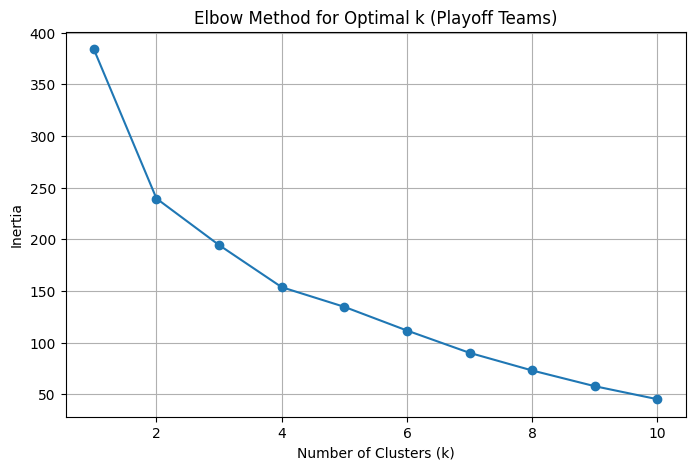

In [7]:
inertia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(teamdata_playoffs_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k (Playoff Teams)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

From the elbow method we can see that the decrease starts to level out at around 2 clusters.

---

# Find the Optimal Number of Clusters (Silhouette Method)

/home/jupyter-nunnk/Cs356/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/jupyter-nunnk/Cs356/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/jupyter-nunnk/Cs356/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/jupyter-nunnk/Cs356/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/ju

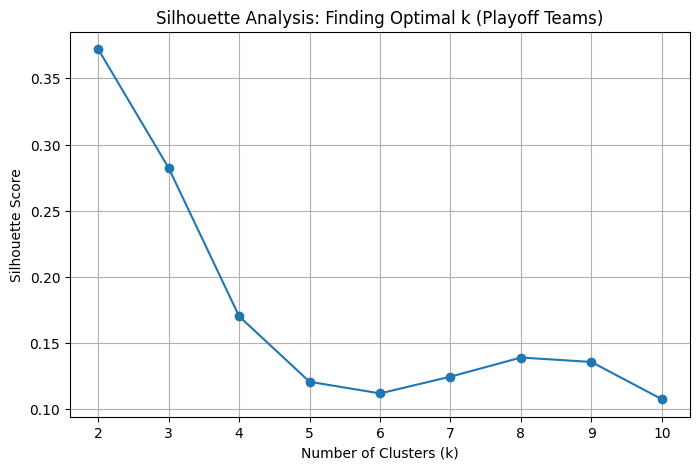

In [8]:
# Range of k values (must start at 2 because silhouette needs at least 2 clusters)
k_range = range(2, 11)

silhouette_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(teamdata_playoffs_scaled)
    score = silhouette_score(teamdata_playoffs_scaled, labels)
    silhouette_scores.append(score)

# Plot Silhouette Scores
plt.figure(figsize=(8,5))
plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis: Finding Optimal k (Playoff Teams)')
plt.grid(True)
plt.show()

The silhouette method strongly suggests that we should only use two clusters as well.

---

# Apply K-Means Clustering with k=2

In [9]:
# Apply KMeans clustering with k=2
k = 2
kmeans = KMeans(n_clusters=k, random_state=42)
teamdata_playoffs['Cluster'] = kmeans.fit_predict(teamdata_playoffs_scaled)

# Preview the playoff teams with their cluster assignments
teamdata_playoffs[['Team', 'Cluster']].head()

/home/jupyter-nunnk/Cs356/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Team,Cluster
0,Oklahoma City Thunder,1
1,Cleveland Cavaliers,1
2,Boston Celtics,1
3,Minnesota Timberwolves,0
4,Houston Rockets,0


---

# Find Averages Among Clusters

In [10]:
# Get the cluster centers in scaled units
centroids_scaled = kmeans.cluster_centers_

# Inverse transform to get original units (undo scaling)
centroids_unscaled = scaler.inverse_transform(centroids_scaled)

# Create a DataFrame to show each cluster's average feature values
centroids_df = pd.DataFrame(
    centroids_unscaled, 
    columns=feature_names
)

# Rename the index to make it pretty
centroids_df.index = [f"Cluster {i}" for i in range(k)]

centroids_df

,Rk,Age,W,L,PW,PL,MOV,SOS,SRS▼,ORtg,...,3PAr,TS%,eFG%,TOV%,ORB%,FT/FGA,eFG%.1,TOV%.1,DRB%,FT/FGA.1
Cluster 0,10.153846,26.930769,47.538462,34.461538,48.153846,33.846154,2.967692,-0.103077,2.866154,115.715385,...,0.409385,0.582308,0.549077,12.538462,25.253846,0.194615,0.538385,12.969231,75.569231,0.186923
Cluster 1,2.000000,26.766667,64.333333,17.666667,64.000000,18.000000,10.506667,-0.573333,9.930000,120.866667,...,0.470667,0.597000,0.566333,10.900000,25.266667,0.178667,0.521000,13.033333,75.133333,0.182000


This lets us see the average statistics of each cluster and what each cluster is being grouped by.

---

# Visualize the Clusters using PCA

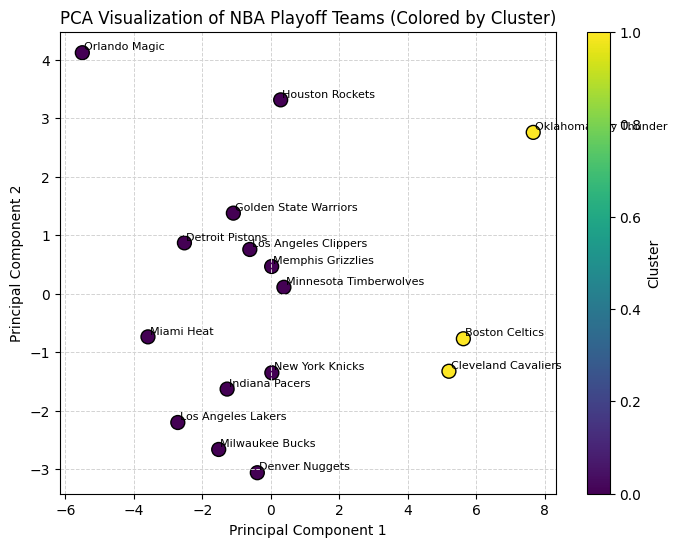

In [11]:
# Reduce dimensions to 2 principal components for visualization
pca = PCA(n_components=2)
teamdata_playoffs_pca = pca.fit_transform(teamdata_playoffs_scaled)

# Create a scatter plot of the clusters
plt.figure(figsize=(8,6))
plt.scatter(
    teamdata_playoffs_pca[:,0], 
    teamdata_playoffs_pca[:,1], 
    c=teamdata_playoffs['Cluster'], 
    cmap='viridis', 
    s=100, 
    edgecolor='k'
)
for i, team in enumerate(teamdata_playoffs['Team']):
    plt.text(
        teamdata_playoffs_pca[i,0]+0.05, 
        teamdata_playoffs_pca[i,1]+0.05, 
        team, 
        fontsize=8
    )
plt.title('PCA Visualization of NBA Playoff Teams (Colored by Cluster)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True, color='lightgray', linestyle='--', linewidth=0.7)
plt.colorbar(label='Cluster')
plt.show()

This visualization shows that the Cavs, Celtics, and Thunder are the 3 statistical anomalies in this dataset. This does make sense because these 3 teams were by a pretty wide margin the best performers in the regular season.

---

# What the Principal Components mean

In [12]:
# Get the PCA components
pca_components = pca.components_

# Create a DataFrame to visualize
pca_loadings = pd.DataFrame(
    pca_components.T, 
    columns=['PC1', 'PC2'], 
    index=feature_names
)

pca_loadings

,PC1,PC2
Rk,-0.267670,-0.040492
Age,-0.004609,-0.248290
W,0.282266,-0.006377
L,-0.282266,0.006377
PW,0.293179,0.050846
PL,-0.293179,-0.050846
MOV,0.294013,0.052062
SOS,-0.059622,0.105880
SRS▼,0.290505,0.064790
ORtg,0.253246,-0.220804


It seems as though PC1 is affected very heavily by Wins, Losses, SRS, Offensive Rating, Net Rating, Margin of Victory, and PL. This means that a higher PC1 = Better Team Performance. PC2 is based off of a mixture of shooting efficiency and defense but is not as clear cut as to whether higher = better as PC1 was.

---

# Model Training 

In [13]:
# Load the NBA playoff dataset
nba_playoff_data = pd.read_csv("nba_playoff_matchups.csv")

nba_playoff_data.head(5)

,Season,Round,Team A,Team B,Team A SRS,Team B SRS,Team A ORtg,Team B ORtg,Team A DRtg,Team B DRtg,Winner
0,2010,First Round,Cleveland Cavaliers,Chicago Bulls,6.1,-1.5,112.4,105.0,104.5,107.8,Cleveland Cavaliers
1,2010,First Round,Orlando Magic,Charlotte Bobcats,5.8,1.2,111.5,103.2,102.1,100.5,Orlando Magic
2,2010,First Round,Atlanta Hawks,Milwaukee Bucks,3.5,0.9,109.8,104.9,106.2,105.3,Atlanta Hawks
3,2010,First Round,Boston Celtics,Miami Heat,2.7,1.0,110.2,106.5,105.4,104.7,Boston Celtics
4,2010,First Round,Los Angeles Lakers,Oklahoma City Thunder,6.3,3.1,112.8,110.3,104.0,106.2,Los Angeles Lakers


This dataset has all of the matchups from every playoff game from 2010-2023 with their SRS (Simple Rating System) that calculates a teams strength based on their average margin of victory (how many points they win by) combined with their strength of schedule (how strong are the teams they play). It also includes each teams ORtg (Offensive Rating) and DRtg (Defensive Rating). The Offensive Rating is the average amount of points a team scores per 100 possessions, higher is better. The Defensive Rating is the average amount of points a team allows per 100 possessions, lower is better. It also includes the season year, round of the playoffs, the teams that played against each other, and the winner. We chose SRS, ORtg, and DRtg as the first 3 metrics to base our model off of because they are all very good predictors as to how good a team is. We might factor in more metrics later to improve accuracy of the model. 

In [14]:
# Identify rows where Team B has higher SRS
mask = nba_playoff_data["Team A SRS"] < nba_playoff_data["Team B SRS"]

# Swap stat columns
cols_to_swap = ["SRS", "ORtg", "DRtg"]
for col in cols_to_swap:
    a_col = f"Team A {col}"
    b_col = f"Team B {col}"
    nba_playoff_data.loc[mask, a_col], nba_playoff_data.loc[mask, b_col] = (
        nba_playoff_data.loc[mask, b_col].values,
        nba_playoff_data.loc[mask, a_col].values
    )

# Swap team names
nba_playoff_data.loc[mask, "Team A"], nba_playoff_data.loc[mask, "Team B"] = (
    nba_playoff_data.loc[mask, "Team B"].values,
    nba_playoff_data.loc[mask, "Team A"].values
)

This is the standardization step. We identify which team is the stronger team by SRS values and then we swap SRS, ORtg, DRtg using the cols_to_swap variable and the for loop. Then the team names are swapped, using the nba_playoff_data. This makes it so that the stronger team is always Team A, which makes the model easier to learn from and reduces unnecessary variance in the data. 

In [15]:
nba_playoff_data["TeamA_Win"] = (nba_playoff_data["Winner"] == nba_playoff_data["Team A"]).astype(int)

This step is to assign the value 1 if Team A wins and the value 0 if Team B wins.

In [16]:
# Recalculate labels and features
nba_playoff_data["SRS_Diff"] = nba_playoff_data["Team A SRS"] - nba_playoff_data["Team B SRS"]
nba_playoff_data["ORtg_Diff"] = nba_playoff_data["Team A ORtg"] - nba_playoff_data["Team B ORtg"]
nba_playoff_data["DRtg_Diff"] = nba_playoff_data["Team B DRtg"] - nba_playoff_data["Team A DRtg"]  # Lower DRtg = better defense

Because the data spans multiple seasons (2010–2023), the average values of metrics like SRS and ORtg can vary from year to year due to changes in league pace, rules, or offensive style. By using relative differences (Team A minus Team B), we remove season-level variance and instead focus on how teams compare to each other in each matchup. We are trying to analyze the factors that affect a teams chance of winning, not how these factors change from season to season as the season variance will alter the model and is irrelevant to the overall outcome of the model.

In [17]:
# Train the model
features = nba_playoff_data[["SRS_Diff", "ORtg_Diff", "DRtg_Diff"]]
target = nba_playoff_data["TeamA_Win"]

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

model = xgb.XGBClassifier(eval_metric='logloss')
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

We selected the features we want to train the model on which is the differences we calculated earlier. We then select the target label and split the dataset to 80% for training and 20% for testing. We then train the XGBoost classifier. XGBoost builds a lot of decision trees and then combine them to make very strong predictions. Since it uses trees it doesn't care about the absolute scale of the numbers it just cares about the best split point. For example "Is SRS_Diff > 3.7? -> Go left or right".

In [18]:
# Evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.6428571428571429


We test the model on the 20% of data we split at the start. We do this to evaluate the models performance. A 65% accuracy is not bad considering we only trained it on 3 metrics. Those 3 metrics being the SRS, the offesnisve rating and the defensive rating.

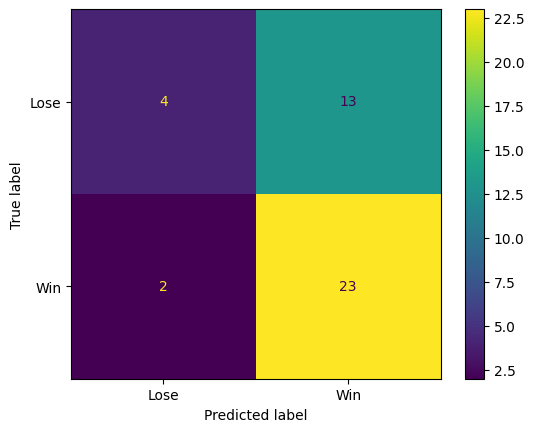

In [19]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Lose", "Win"]).plot()

Based on this matrix it seems like this model is biased on predicting a win. 

In [20]:
print(classification_report(y_test, y_pred, target_names=["Lose", "Win"]))

              precision    recall  f1-score   support

        Lose       0.67      0.24      0.35        17
         Win       0.64      0.92      0.75        25

    accuracy                           0.64        42
   macro avg       0.65      0.58      0.55        42
weighted avg       0.65      0.64      0.59        42



This provides more proof that the model is way too biased in predicting a win, the f1-score for a loss is 35% and the f1-score for a win is 75%. Maybe we do not have enough features yet?

---

# Matchup Probability Function

In [21]:
def predict_matchup_probability(team1, team2, team_stats_df, model):
    # Lookup stats for both teams
    row1 = team_stats_df[team_stats_df["Team"] == team1].iloc[0]
    row2 = team_stats_df[team_stats_df["Team"] == team2].iloc[0]

    # Determine which team is "better" (higher SRS)
    if row1["SRS▼"] >= row2["SRS▼"]:
        better_team, worse_team = row1, row2
        better_name, worse_name = team1, team2
    else:
        better_team, worse_team = row2, row1
        better_name, worse_name = team2, team1

    # Compute feature differences with better team as Team A
    srs_diff = better_team["SRS▼"] - worse_team["SRS▼"]
    ortg_diff = better_team["ORtg"] - worse_team["ORtg"]
    drtg_diff = worse_team["DRtg"] - better_team["DRtg"]  # Lower DRtg = better defense

    # Prepare input features
    features = pd.DataFrame({
        "SRS_Diff": [srs_diff],
        "ORtg_Diff": [ortg_diff],
        "DRtg_Diff": [drtg_diff]
    })

    # Predict probability that the better team (Team A) wins
    prob_better_team_wins = model.predict_proba(features)[0][1]

    # Return a detailed result
    return {
        "better_team": better_name,
        "worse_team": worse_name,
        "win_probability": prob_better_team_wins
    }


This is a function that is used to predict each matchup that is in the playoffs. This function takes in two NBA teams, a DataFrame of team statistics, and the trained XGBoost model. It starts by extracting the season stats for the two teams (from the original dataset for the 2024-2025 season), then it compares the SRS values and assigns the one with the higher SRS value "better_team". We then compute the differences in the 3 metrics and prepare them as input features into the model. Finally, we predict the probability that the better team will win and then return a dictionary with the results.

In [22]:
first_round_matchups = [
    # West
    ("Oklahoma City Thunder", "Memphis Grizzlies"),
    ("Los Angeles Lakers", "Minnesota Timberwolves"),
    ("Denver Nuggets", "Los Angeles Clippers"),
    ("Houston Rockets", "Golden State Warriors"),
    
    # East
    ("Cleveland Cavaliers", "Miami Heat"),
    ("Indiana Pacers", "Milwaukee Bucks"),
    ("Boston Celtics", "Orlando Magic"),
    ("Detroit Pistons", "New York Knicks")
]

for team_a, team_b in first_round_matchups:
    result = predict_matchup_probability(team_a, team_b, teamdata_playoffs, model)
    print(f"{result['better_team']} vs {result['worse_team']} → {result['better_team']} win probability: {result['win_probability']:.2%}, {result['worse_team']}: {1 - result['win_probability']:.2%}")

Oklahoma City Thunder vs Memphis Grizzlies → Oklahoma City Thunder win probability: 98.80%, Memphis Grizzlies: 1.20%
Minnesota Timberwolves vs Los Angeles Lakers → Minnesota Timberwolves win probability: 61.56%, Los Angeles Lakers: 38.44%
Los Angeles Clippers vs Denver Nuggets → Los Angeles Clippers win probability: 88.99%, Denver Nuggets: 11.01%
Houston Rockets vs Golden State Warriors → Houston Rockets win probability: 27.60%, Golden State Warriors: 72.40%
Cleveland Cavaliers vs Miami Heat → Cleveland Cavaliers win probability: 82.17%, Miami Heat: 17.83%
Milwaukee Bucks vs Indiana Pacers → Milwaukee Bucks win probability: 16.08%, Indiana Pacers: 83.92%
Boston Celtics vs Orlando Magic → Boston Celtics win probability: 97.47%, Orlando Magic: 2.53%
New York Knicks vs Detroit Pistons → New York Knicks win probability: 98.76%, Detroit Pistons: 1.24%


We specify in a list of tuples, each playoff series for the first round of the playoffs in 2025. The matchups are split between the East and the West and we iterate through each matchup and call the predict_matchup_probability function for each one and then print them out.

These percentages seem fairly accurate but it is impossible to take into account every single factor such as injuries, playoff overperformers/underperformers and other factors like home court advantage. One notable upset that already happened based on these predictions are the Nuggets beating the Clippers. This shows the unpredictability of sports games which is one of the many reasons why they are so entertaining.

---

# Simulation Functions

In [23]:
# Function to simulate a series based on win probability of better team
def simulate_series(team_a, team_b, team_stats_df, model):
    result = predict_matchup_probability(team_a, team_b, team_stats_df, model)
    win_prob = result["win_probability"]
    winner = result["better_team"] if np.random.rand() < win_prob else result["worse_team"]
    return winner

This function predicts the win probability using the predict_matchup_probability function. It uses the np.random.rand() to turn the decimal probability into a percentage and then returns the winner for that series. 

In [24]:
# Full playoff simulation function
def simulate_full_playoffs(team_stats_df, model, n_simulations=1000):
    championship_counts = defaultdict(int)

    for _ in range(n_simulations):
        # Round 1
        r1_matchups = [
            ("Oklahoma City Thunder", "Memphis Grizzlies"),
            ("Los Angeles Lakers", "Minnesota Timberwolves"),
            ("Denver Nuggets", "Los Angeles Clippers"),
            ("Houston Rockets", "Golden State Warriors"),
            ("Cleveland Cavaliers", "Miami Heat"),
            ("Indiana Pacers", "Milwaukee Bucks"),
            ("Boston Celtics", "Orlando Magic"),
            ("Detroit Pistons", "New York Knicks"),
        ]
        r1_winners = [simulate_series(a, b, team_stats_df, model) for a, b in r1_matchups]

        # Round 2
        r2_matchups = [
            (r1_winners[0], r1_winners[1]),  # West semifinals
            (r1_winners[2], r1_winners[3]),
            (r1_winners[4], r1_winners[5]),  # East semifinals
            (r1_winners[6], r1_winners[7])
        ]
        r2_winners = [simulate_series(a, b, team_stats_df, model) for a, b in r2_matchups]

        # Conference Finals
        west_final = simulate_series(r2_winners[0], r2_winners[1], team_stats_df, model)
        east_final = simulate_series(r2_winners[2], r2_winners[3], team_stats_df, model)

        # NBA Finals
        champion = simulate_series(west_final, east_final, team_stats_df, model)
        championship_counts[champion] += 1

    return championship_counts

This function runs a simulations of the 2025 playoffs and predicts who will win the championship. It simulates the first round of the playoffs which has 8 series and then it takes the winners of these series and simulates the second round which has 4 series. Then it repeats this until the finals and increments the winning teams championship count.

In [26]:
# Run the simulation
results = simulate_full_playoffs(teamdata_playoffs, model, n_simulations=1000)

# Convert to DataFrame for display
results_df = pd.DataFrame(list(results.items()), columns=["Team", "Championships"])
results_df["Win %"] = results_df["Championships"] / 1000 * 100
results_df.sort_values("Win %", ascending=False, inplace=True)

# Display results
print("NBA Finals Probabilities (Monte Carlo Simulation, 1000 runs)")
print(results_df.to_string(index=False))

NBA Finals Probabilities (Monte Carlo Simulation, 1000 runs)
                 Team  Championships  Win %
Oklahoma City Thunder            858   85.8
  Cleveland Cavaliers             91    9.1
       Boston Celtics             28    2.8
      New York Knicks             18    1.8
 Los Angeles Clippers              3    0.3
Golden State Warriors              1    0.1
       Denver Nuggets              1    0.1


We then run the simulation function 1000 times and then display the results. Based on this simulation simulating 1,000 playoff matchups brackets, it seems that OKC is the overwhelming favorite to win the title this year. Cavs and Celtics are the favorites from the East but OKC had a very historic regular season so it makes sense that they are the favorites.

---

## This is a another notebook that shows the value of each basic statistic in a teams chance at winning 

[Go to game_stats](game_stats.ipynb)


# More Accurate Model Training

Our previous model was decent, it was fairly accurate but it had a lot of False Positives. This might be because of the limited attributes it is analyzing so I went through and made a csv file with a lot more attributes that we can analyze and hopefully get a higher accuracy.

We can also use TPOT in order to make sure we are using the best model. I will use TPOT on the dataset with 3 features and then on the dataset with all of the features and see if there's any difference.

# TPOT with 3 Features

In [27]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# TPOT Classifier
tpot = TPOTClassifier(generations=5, population_size=50, verbosity=2, random_state=42)
tpot.fit(X_train, y_train)

# Evaluate
print("TPOT Test Accuracy:", tpot.score(X_test, y_test))

# Export best pipeline to a file
tpot.export("tpot_best_pipeline.py")

Version 0.12.0 of tpot is outdated. Version 1.0.0 was released Wednesday February 26, 2025.


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8096256684491978

Generation 2 - Current best internal CV score: 0.8096256684491978

Generation 3 - Current best internal CV score: 0.8096256684491978

Generation 4 - Current best internal CV score: 0.8096256684491978

Generation 5 - Current best internal CV score: 0.8160427807486631

Best pipeline: MLPClassifier(GaussianNB(input_matrix), alpha=0.1, learning_rate_init=0.001)
TPOT Test Accuracy: 0.5952380952380952


/home/jupyter-nunnk/Cs356/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/home/jupyter-nunnk/Cs356/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


TPOT recommends to use MPLClassifier with the 3 features, I'll do TPOT with all of the features after I use XGBoost on all the features in order to see if it recommends a different pipeline.

There are now a lot more than just the 3 statistics from each team in every playoff matchup. If you are wondering what any of these statistics mean they are defined at the start of my notebook. Below this I will train XGBoost again but this time on all of the features, I used pretty much the same strategy as I explained before with a few tweaks.

---

# New Dataset with More Features

In [28]:
# Load full advanced playoff data
nba_playoff_data_adv = pd.read_csv("NBA_Full_Playoff_Matchups_Stats.csv")

nba_playoff_data_adv.head()

,Season,Round,Team A,Team B,Team A SRS,Team B SRS,Team A ORtg,Team B ORtg,Team A DRtg,Team B DRtg,...,Team A NRtg,Team B NRtg,Team A Pace,Team B Pace,Team A FTr,Team B FTr,Team A 3PAr,Team B 3PAr,Team A TS%,Team B TS%
0,2010,First Round,Cleveland Cavaliers,Chicago Bulls,6.17,-1.64,111.2,103.5,104.1,105.3,...,7.1,-1.8,91.4,93.1,0.341,0.287,0.248,0.156,0.570,0.520
1,2010,First Round,Orlando Magic,Charlotte Bobcats,7.12,1.30,111.4,104.4,103.3,102.8,...,8.1,1.6,92.0,90.4,0.340,0.346,0.350,0.211,0.573,0.538
2,2010,First Round,Atlanta Hawks,Milwaukee Bucks,4.44,1.37,111.9,104.9,106.7,103.1,...,5.2,1.8,90.1,91.7,0.281,0.239,0.214,0.259,0.545,0.518
3,2010,First Round,Boston Celtics,Miami Heat,3.37,1.99,107.7,106.6,103.8,104.1,...,3.9,2.5,91.6,89.6,0.332,0.296,0.228,0.219,0.564,0.537
4,2010,First Round,Los Angeles Lakers,Oklahoma City Thunder,4.78,3.55,108.8,108.3,103.7,104.6,...,5.1,3.7,92.8,93.1,0.289,0.333,0.227,0.185,0.538,0.547


In [29]:
# Normalize: make Team A always the stronger team (based on SRS)
mask = nba_playoff_data_adv["Team A SRS"] < nba_playoff_data_adv["Team B SRS"]

# Swap all stat pairs between Team A and Team B where Team B has higher SRS
cols_to_pair = [col.replace("Team A ", "") for col in nba_playoff_data_adv.columns if col.startswith("Team A ") and f"Team B {col[7:]}" in nba_playoff_data_adv.columns]

for col in cols_to_pair:
    a_col = f"Team A {col}"
    b_col = f"Team B {col}"
    nba_playoff_data_adv.loc[mask, a_col], nba_playoff_data_adv.loc[mask, b_col] = (
        nba_playoff_data_adv.loc[mask, b_col].values,
        nba_playoff_data_adv.loc[mask, a_col].values
    )

# Swap team names
nba_playoff_data_adv.loc[mask, "Team A"], nba_playoff_data_adv.loc[mask, "Team B"] = (
    nba_playoff_data_adv.loc[mask, "Team B"].values,
    nba_playoff_data_adv.loc[mask, "Team A"].values
)

# Recalculate label
nba_playoff_data_adv["TeamA_Win"] = (nba_playoff_data_adv["Winner"] == nba_playoff_data_adv["Team A"]).astype(int)

# Feature Engineering: Create _Diff columns for every numeric pair
diff_features = []
for col in cols_to_pair:
    a_col = f"Team A {col}"
    b_col = f"Team B {col}"
    diff_col = f"{col}_Diff"
    
    # DRtg is reversed (lower is better)
    if col == "DRtg":
        nba_playoff_data_adv[diff_col] = nba_playoff_data_adv[b_col] - nba_playoff_data_adv[a_col]
    else:
        nba_playoff_data_adv[diff_col] = nba_playoff_data_adv[a_col] - nba_playoff_data_adv[b_col]
    
    diff_features.append(diff_col)

In [30]:
# Model training
features = nba_playoff_data_adv[diff_features]
target = nba_playoff_data_adv["TeamA_Win"]

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

model_full = xgb.XGBClassifier(eval_metric='logloss')
model_full.fit(X_train, y_train)


# Evaluate
y_pred = model_full.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.6888888888888889


Accuracy increased by about 4% with more features, not bad but still not the best.

              precision    recall  f1-score   support

        Lose       0.88      0.35      0.50        20
         Win       0.65      0.96      0.77        25

    accuracy                           0.69        45
   macro avg       0.76      0.66      0.64        45
weighted avg       0.75      0.69      0.65        45



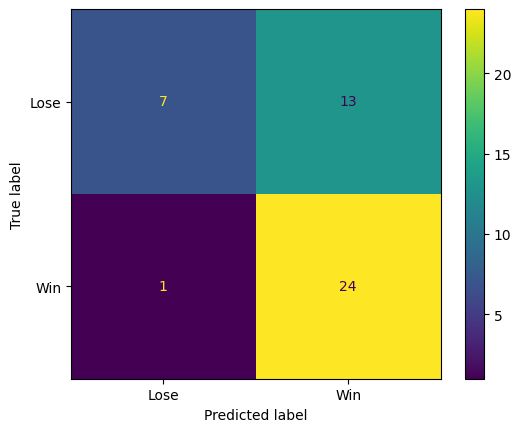

In [31]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Lose", "Win"]).plot()

print(classification_report(y_test, y_pred, target_names=["Lose", "Win"]))

The model is still predicting a lot more wins than necessary. Not ideal, lets now use TPOT to see what the best pipeline would be with more than 3 features.

# TPOT with More Features

In [32]:
# Use all engineered difference features
features = nba_playoff_data_adv[diff_features]
target = nba_playoff_data_adv["TeamA_Win"]

# Stratified split is optional but usually helpful
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, random_state=42, stratify=target
)

# TPOT AutoML
tpot = TPOTClassifier(
    generations=5,
    population_size=50,
    verbosity=2,
    random_state=42,
    scoring='accuracy',  # can be changed to f1, roc_auc, etc.
    disable_update_check=True
)

tpot.fit(X_train, y_train)

# Accuracy on test set
print("TPOT Test Accuracy:", tpot.score(X_test, y_test))

# Export the best pipeline to a Python file
tpot.export("tpot_best_pipeline_adv.py")

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Best pipeline: RandomForestClassifier(MinMaxScaler(input_matrix), bootstrap=True, criterion=gini, max_features=0.2, min_samples_leaf=8, min_samples_split=4, n_estimators=100)
TPOT Test Accuracy: 0.7555555555555555


This time TPOT recommends to use ExtraTreesClassifier and it says it has a test accuracy of 75% which is very good, lets now train this model and see.

---

# Try ExtraTrees Model with More Features

In [33]:
# ExtraTrees model using the same features and splits
et_model = ExtraTreesClassifier(
    bootstrap=False,
    criterion='gini',
    max_features=0.95,
    min_samples_leaf=4,
    min_samples_split=7,
    n_estimators=100,
    random_state=42
)

et_model.fit(X_train, y_train)

# Predict on test set
et_y_pred = et_model.predict(X_test)

# Evaluate
print("ExtraTreesClassifier Test Accuracy:", accuracy_score(y_test, et_y_pred))

ExtraTreesClassifier Test Accuracy: 0.7555555555555555


Well 66% is not 75% as it said it would be. After researching online I found that TPOT uses cross-validation which means it is tested on multiple internal test sets and gives the average. Our actual test set that ETC is used on seems to just be a harder set.

In [34]:
cv_scores = cross_val_score(et_model, features, target, cv=5, scoring='accuracy')
print("ExtraTrees Cross-Validated Accuracy:", cv_scores.mean())

ExtraTrees Cross-Validated Accuracy: 0.72


This sort of proves what I was talking about, with cross-validation we get an accuracy score of over 70%.

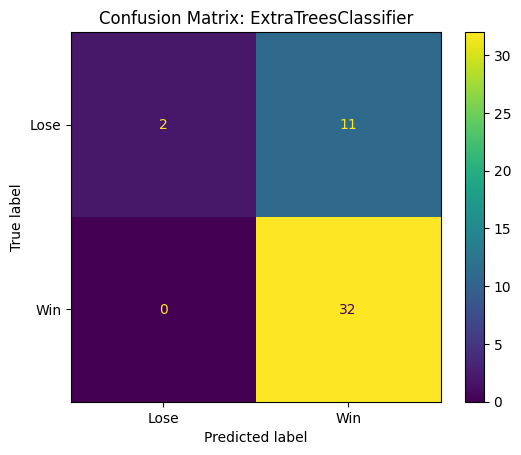

              precision    recall  f1-score   support

        Lose       1.00      0.15      0.27        13
         Win       0.74      1.00      0.85        32

    accuracy                           0.76        45
   macro avg       0.87      0.58      0.56        45
weighted avg       0.82      0.76      0.68        45



In [35]:
et_cm = confusion_matrix(y_test, et_y_pred)
ConfusionMatrixDisplay(confusion_matrix=et_cm, display_labels=["Lose", "Win"]).plot()
plt.title("Confusion Matrix: ExtraTreesClassifier")
plt.show()

print(classification_report(y_test, et_y_pred, target_names=["Lose", "Win"]))

The confusion Matrix also shows a bit worse results than using XGBoost.

It seems like XGBoost is a good model for what we are doing, lets now do another simulation of this years playoffs with the better model.

---

# Run the Simulation again with Improved XGBoost Model

I couldn't figure out how to reuse the simulation functions with more features while also having it work with the original 3 features so i just redefined each function and made a few tweaks to make it work with more features.

In [36]:
# Map feature names to raw stat column names
stat_column_map = {
    "SRS": "SRS▼", "ORtg": "ORtg", "DRtg": "DRtg", "Age": "Age", "W": "W", "L": "L",
    "PW": "PW", "PL": "PL", "MOV": "MOV", "SOS": "SOS", "NRtg": "NRtg", "Pace": "Pace",
    "FTr": "FTr", "3PAr": "3PAr", "TS%": "TS%"
}

# List of features the model expects
diff_features = [
    "SRS_Diff", "ORtg_Diff", "DRtg_Diff", "Age_Diff", "W_Diff", "L_Diff", "PW_Diff", "PL_Diff",
    "MOV_Diff", "SOS_Diff", "NRtg_Diff", "Pace_Diff", "FTr_Diff", "3PAr_Diff", "TS%_Diff"
]

In [37]:
# Prediction function with stat differences computed on-the-fly
def predict_matchup_probability_full(team1, team2, team_stats_df, model):
    row1 = team_stats_df[team_stats_df["Team"] == team1].iloc[0]
    row2 = team_stats_df[team_stats_df["Team"] == team2].iloc[0]

    if row1["SRS▼"] >= row2["SRS▼"]:
        better_team, worse_team = row1, row2
    else:
        better_team, worse_team = row2, row1

    input_data = {}
    for diff in diff_features:
        stat = diff.replace("_Diff", "")
        raw_col = stat_column_map[stat]
        if stat == "DRtg":
            input_data[diff] = worse_team[raw_col] - better_team[raw_col]
        else:
            input_data[diff] = better_team[raw_col] - worse_team[raw_col]

    feature_df = pd.DataFrame([input_data])
    win_prob = model.predict_proba(feature_df)[0][1]

    return {
        "better_team": better_team["Team"],
        "worse_team": worse_team["Team"],
        "win_probability": win_prob
    }

In [38]:
for team_a, team_b in first_round_matchups:
    result = predict_matchup_probability_full(team_a, team_b, teamdata_playoffs, model_full)
    print(
        f"{result['better_team']} vs {result['worse_team']} → "
        f"{result['better_team']} win probability: {result['win_probability']:.2%}, "
        f"{result['worse_team']}: {1 - result['win_probability']:.2%}"
    )

Oklahoma City Thunder vs Memphis Grizzlies → Oklahoma City Thunder win probability: 97.15%, Memphis Grizzlies: 2.85%
Minnesota Timberwolves vs Los Angeles Lakers → Minnesota Timberwolves win probability: 94.44%, Los Angeles Lakers: 5.56%
Los Angeles Clippers vs Denver Nuggets → Los Angeles Clippers win probability: 32.24%, Denver Nuggets: 67.76%
Houston Rockets vs Golden State Warriors → Houston Rockets win probability: 87.23%, Golden State Warriors: 12.77%
Cleveland Cavaliers vs Miami Heat → Cleveland Cavaliers win probability: 99.61%, Miami Heat: 0.39%
Milwaukee Bucks vs Indiana Pacers → Milwaukee Bucks win probability: 55.62%, Indiana Pacers: 44.38%
Boston Celtics vs Orlando Magic → Boston Celtics win probability: 98.00%, Orlando Magic: 2.00%
New York Knicks vs Detroit Pistons → New York Knicks win probability: 97.52%, Detroit Pistons: 2.48%


Interesting with more features it now thinks that the Rockets should win against the Warriors (they lost) and the Bucks should win against the Pacers (they lost). It did correctly predict the rest including Denver's win over the clippers where it originally predicted the opposite.

In [39]:
# Simulate a single playoff series
def simulate_series_full(team_a, team_b, team_stats_df, model):
    result = predict_matchup_probability_full(team_a, team_b, team_stats_df, model)
    prob = result["win_probability"]
    return result["better_team"] if np.random.rand() < prob else result["worse_team"]

# Full playoff simulation (Monte Carlo)
def simulate_full_playoffs_full(team_stats_df, model, n_simulations=1000):
    championship_counts = defaultdict(int)

    for _ in range(n_simulations):
        # Round 1
        r1 = [simulate_series_full(a, b, team_stats_df, model) for a, b in first_round_matchups]

        # Round 2
        r2 = [
            (r1[0], r1[1]),
            (r1[2], r1[3]),
            (r1[4], r1[5]),
            (r1[6], r1[7])
        ]
        r2_winners = [simulate_series_full(a, b, team_stats_df, model) for a, b in r2]

        # Conference Finals
        west_final = simulate_series_full(r2_winners[0], r2_winners[1], team_stats_df, model)
        east_final = simulate_series_full(r2_winners[2], r2_winners[3], team_stats_df, model)

        # NBA Finals
        champion = simulate_series_full(west_final, east_final, team_stats_df, model)
        championship_counts[champion] += 1

    return championship_counts

In [40]:
# Run the simulation
results = simulate_full_playoffs_full(teamdata_playoffs, model_full, n_simulations=1000)

# Display results
results_df = pd.DataFrame(list(results.items()), columns=["Team", "Championships"])
results_df["Win %"] = results_df["Championships"] / 1000 * 100
results_df.sort_values("Win %", ascending=False, inplace=True)

print("NBA Finals Probabilities (Using Full Feature Model, 1000 Simulations)")
print(results_df.to_string(index=False))

NBA Finals Probabilities (Using Full Feature Model, 1000 Simulations)
                  Team  Championships  Win %
 Oklahoma City Thunder            747   74.7
   Cleveland Cavaliers            178   17.8
        Boston Celtics             46    4.6
Minnesota Timberwolves             13    1.3
       Houston Rockets              5    0.5
        Denver Nuggets              5    0.5
       New York Knicks              4    0.4
     Memphis Grizzlies              1    0.1
  Los Angeles Clippers              1    0.1


This simulation gives the Cavs a higher chance than before but still OKC is the dominating favorite to win and this does seem to be coming true, OKC are now in the finals. One interesting thing is that out of 1,000 simulations, this model did not have the Pacers winning a single time and assuming they don't choke a 3-1 lead they will be in the finals facing off against OKC. 

---

If we had more time the next step would be to add in two more datasets, one with a lot of previous playoff matchups with more basic statistics such as rebounds, assists, steals, blocks, turnovers, etc. I think if we included more predictors of losses such as turnovers it would improve our accuracy score by a lot while also making our CM look more balanced. We could add these additional statistics into the same CSV full_playoff_matchups and then add in these same statistics into our test dataset of this years playoffs and then re-run our model. I predict that accuracy could increase up to about 75% which would be very good considering we are trying to predict sports games that can be very unpredictable.